In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    #"font.family": "Helvetica"
})

log = lambda x: np.log(x+0j)
sqrt = lambda x: np.sqrt(x+0j)

In [2]:
# Input data from PDG 2023
GF = 1.1663788e-5 #GeV-2
mZ = 91.1876 #GeV
mtau = 1.77686 #GeV
t = mtau**2/mZ**2
prefactor = 2**0.5/4*mZ**2*GF #(g/4cW)^2
s2W = 0.22339 #\sin^2\theta_W at tree level (=1-mW^2/mZ^2)
s2Weff = 0.23155 #\sin^2\theta_W with 1-loop corrections
c2Weff = 1-s2Weff
c = 1-4*s2W
aem = 1/137.035999180
aem_mZ = 1/127.951

Gammatau_SM = 0.08377 #GeV
Gammahad_SM = 1.7497 #GeV
Gammatau_exp = 0.08408 #GeV
Gammatau_err = 0.00022 #GeV
# arXiv:1912.02067 Table B.13
Rtau_exp = 20.7644
Rtau_err = 0.048

Lambda = 1000 #GeV
mu = 4*np.pi*Lambda


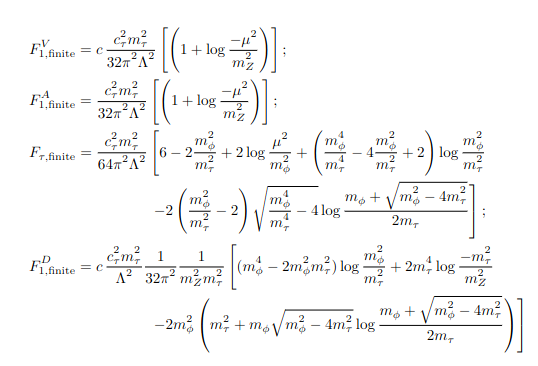

In [3]:
F1Afin: complex = mtau**2/(32*np.pi**2*Lambda**2)*(1+log(-mu**2/mZ**2))

F1Vfin = c*F1Afin

def Ftaufin(mphi) -> complex:
    return mtau**2/(64*np.pi**2*Lambda**2)*(6-2*mphi**2/mtau**2+2*log(mu**2/mphi**2)+(mphi**4/mtau**4-4*mphi**2/mtau**2+2)*log(mphi**2/mtau**2)-2*(mphi**2/mtau**2-2)*sqrt(mphi**4/mtau**2-4)*log((mphi+sqrt(mphi**2-4*mtau**2))/(2*mtau)))

def F1Dfin(mphi: float) -> complex:
    return c/(32*np.pi**2*Lambda**2*mZ**2)*((mphi**4-2*mphi**2*mtau**2)*log(mphi**2/mtau**2)+2*mtau**4*log(-mtau**2/mZ**2)-2*mphi**2*(mtau**2+mphi*sqrt(mphi**2-4*mtau**2)*log((mphi+sqrt(mphi**2-4*mtau**2))/(2*mtau))))

deltaFA = lambda mphi: F1Afin + Ftaufin(mphi)
deltaFV = lambda mphi: F1Vfin + Ftaufin(mphi)

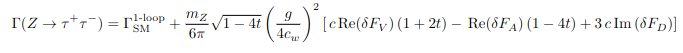

In [4]:
def deltaGamma_loop(mphi: float) -> float:
    return prefactor*mZ/(6*np.pi)*(1-4*t)**0.5*(c*deltaFV(mphi).real*(1+2*t)-deltaFA(mphi).real*(1-4*t)+3*c*F1Dfin(mphi).imag)

In [5]:
mphi_list = [10**x for x in np.linspace(-3, 1, 500)]

In [6]:
bound_Gamma_upper1 = [((Gammatau_exp+Gammatau_err-Gammatau_SM)/deltaGamma_loop(mphi))**0.5 for mphi in mphi_list]
bound_Gamma_upper2 = [((Gammatau_exp+2*Gammatau_err-Gammatau_SM)/deltaGamma_loop(mphi))**0.5 for mphi in mphi_list]

/tmp/ipykernel_22393/3287134178.py:1: RuntimeWarning: invalid value encountered in double_scalars
  bound_Gamma_upper1 = [((Gammatau_exp+Gammatau_err-Gammatau_SM)/deltaGamma_loop(mphi))**0.5 for mphi in mphi_list]
/tmp/ipykernel_22393/3287134178.py:2: RuntimeWarning: invalid value encountered in double_scalars
  bound_Gamma_upper2 = [((Gammatau_exp+2*Gammatau_err-Gammatau_SM)/deltaGamma_loop(mphi))**0.5 for mphi in mphi_list]


In [7]:
bound_Gamma_lower1 = [((Gammatau_exp-Gammatau_err-Gammatau_SM)/deltaGamma_loop(mphi))**0.5 for mphi in mphi_list]
bound_Gamma_lower2 = [((Gammatau_exp-2*Gammatau_err-Gammatau_SM)/deltaGamma_loop(mphi))**0.5 for mphi in mphi_list]

/tmp/ipykernel_22393/3839001880.py:1: RuntimeWarning: invalid value encountered in double_scalars
  bound_Gamma_lower1 = [((Gammatau_exp-Gammatau_err-Gammatau_SM)/deltaGamma_loop(mphi))**0.5 for mphi in mphi_list]
/tmp/ipykernel_22393/3839001880.py:2: RuntimeWarning: invalid value encountered in double_scalars
  bound_Gamma_lower2 = [((Gammatau_exp-2*Gammatau_err-Gammatau_SM)/deltaGamma_loop(mphi))**0.5 for mphi in mphi_list]


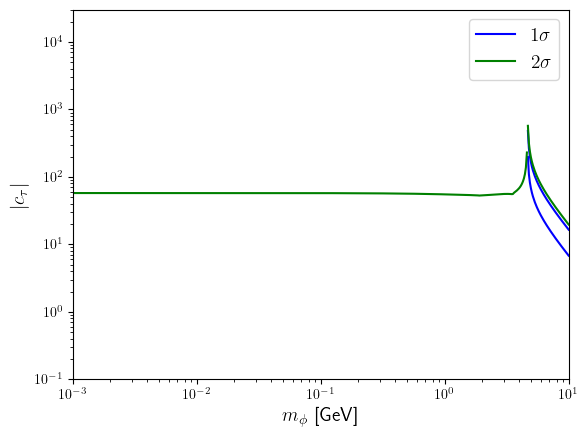

In [8]:
plt.loglog(mphi_list, bound_Gamma_lower1, color='blue', label=r'$1 \sigma$')
plt.loglog(mphi_list, bound_Gamma_upper1, color='blue')
plt.loglog(mphi_list, bound_Gamma_lower2, color='green', label=r'$2 \sigma$')
plt.loglog(mphi_list, bound_Gamma_upper2, color='green')
plt.xlim(1e-3, 10)
plt.ylim(1e-1, 3e4)
plt.xlabel(r'$m_\phi$ [GeV]', fontsize=14)
plt.ylabel(r'$|c_\tau|$', fontsize=14)
plt.legend(fontsize=14)

Text(0, 0.5, '$\\delta \\Gamma(Z\\to\\tau^+\\tau^-)$')

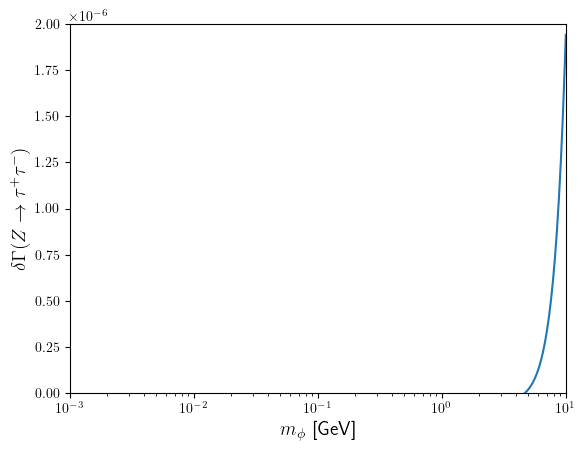

In [9]:
plt.semilogx(mphi_list, [deltaGamma_loop(m) for m in mphi_list])
plt.ylim(0, 2e-6)
plt.xlim(1e-3, 10)
plt.xlabel(r'$m_\phi$ [GeV]', fontsize=14)
plt.ylabel(r'$\delta \Gamma(Z\to\tau^+\tau^-)$', fontsize=14)

In [10]:
bound_R_upper1 = [((Gammahad_SM/(Rtau_exp+Rtau_err)-Gammatau_SM)/deltaGamma_loop(m))**0.5 for m in mphi_list]
bound_R_upper2 = [((Gammahad_SM/(Rtau_exp+2*Rtau_err)-Gammatau_SM)/deltaGamma_loop(m))**0.5 for m in mphi_list]
bound_R_upper3 = [((Gammahad_SM/(Rtau_exp+3*Rtau_err)-Gammatau_SM)/deltaGamma_loop(m))**0.5 for m in mphi_list]

/tmp/ipykernel_22393/3424075555.py:1: RuntimeWarning: invalid value encountered in double_scalars
  bound_R_upper1 = [((Gammahad_SM/(Rtau_exp+Rtau_err)-Gammatau_SM)/deltaGamma_loop(m))**0.5 for m in mphi_list]
/tmp/ipykernel_22393/3424075555.py:2: RuntimeWarning: invalid value encountered in double_scalars
  bound_R_upper2 = [((Gammahad_SM/(Rtau_exp+2*Rtau_err)-Gammatau_SM)/deltaGamma_loop(m))**0.5 for m in mphi_list]
/tmp/ipykernel_22393/3424075555.py:3: RuntimeWarning: invalid value encountered in double_scalars
  bound_R_upper3 = [((Gammahad_SM/(Rtau_exp+3*Rtau_err)-Gammatau_SM)/deltaGamma_loop(m))**0.5 for m in mphi_list]


In [11]:
bound_R_lower1 = [((Gammahad_SM/(Rtau_exp-Rtau_err)-Gammatau_SM)/deltaGamma_loop(m))**0.5 for m in mphi_list]
bound_R_lower2 = [((Gammahad_SM/(Rtau_exp-2*Rtau_err)-Gammatau_SM)/deltaGamma_loop(m))**0.5 for m in mphi_list]
bound_R_lower3 = [((Gammahad_SM/(Rtau_exp-3*Rtau_err)-Gammatau_SM)/deltaGamma_loop(m))**0.5 for m in mphi_list]

/tmp/ipykernel_22393/261280697.py:1: RuntimeWarning: invalid value encountered in double_scalars
  bound_R_lower1 = [((Gammahad_SM/(Rtau_exp-Rtau_err)-Gammatau_SM)/deltaGamma_loop(m))**0.5 for m in mphi_list]
/tmp/ipykernel_22393/261280697.py:2: RuntimeWarning: invalid value encountered in double_scalars
  bound_R_lower2 = [((Gammahad_SM/(Rtau_exp-2*Rtau_err)-Gammatau_SM)/deltaGamma_loop(m))**0.5 for m in mphi_list]
/tmp/ipykernel_22393/261280697.py:3: RuntimeWarning: invalid value encountered in double_scalars
  bound_R_lower3 = [((Gammahad_SM/(Rtau_exp-3*Rtau_err)-Gammatau_SM)/deltaGamma_loop(m))**0.5 for m in mphi_list]


Text(0.5, 1.0, '$R_\\tau$')

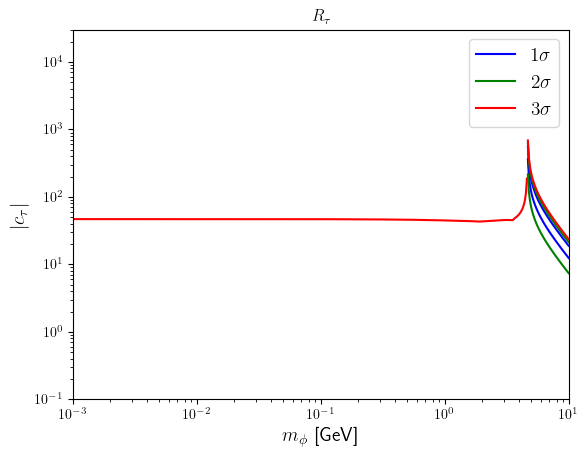

In [12]:
plt.loglog(mphi_list, bound_R_lower1, color='blue', label=r'$1 \sigma$')
plt.loglog(mphi_list, bound_R_upper1, color='blue')
plt.loglog(mphi_list, bound_R_lower2, color='green', label=r'$2 \sigma$')
plt.loglog(mphi_list, bound_R_upper2, color='green')
plt.loglog(mphi_list, bound_R_lower3, color='red', label=r'$3 \sigma$')
plt.loglog(mphi_list, bound_R_upper3, color='red')
plt.xlim(1e-3, 10)
plt.ylim(1e-1, 3e4)
plt.xlabel(r'$m_\phi$ [GeV]', fontsize=14)
plt.ylabel(r'$|c_\tau|$', fontsize=14)
plt.legend(fontsize=14)
plt.title(r"$R_\tau$")

In [13]:
Atau_SM = 0.1468 # PDG Table 10.5 (A_e = A_tau)
Atau_exp = 0.143
Atau_err = 0.004

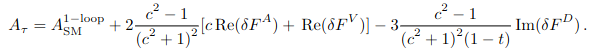

In [14]:
def Atau_phi(mphi):
    return 2*(c**2-1)/(c**2+1)**2*(c*deltaFA(mphi).real+deltaFV(mphi).real)-3*(c**-1)/(c**2+1)**2/(1-mtau**2/mZ**2)*F1Dfin(mphi).imag

In [15]:
deltaAtau = [Atau_phi(m) for m in mphi_list]

bound_Atau = []
for dA in deltaAtau:
    if dA < 0:
        bound_Atau.append(((Atau_exp-Atau_err-Atau_SM)/dA)**0.5)
    else:
        bound_Atau.append(((Atau_exp+Atau_err-Atau_SM)/dA)**0.5)        

Text(0.5, 1.0, '$A_\\tau$')

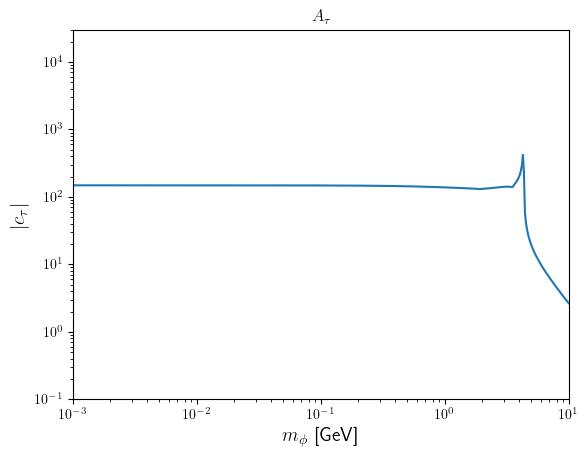

In [16]:
plt.loglog(mphi_list, bound_Atau)
plt.xlim(1e-3, 10)
plt.ylim(1e-1, 3e4)
plt.xlabel(r'$m_\phi$ [GeV]', fontsize=14)
plt.ylabel(r'$|c_\tau|$', fontsize=14)
plt.title(r"$A_\tau$")

In [17]:
gV_exp = -0.0366
gV_err =  0.0010

gA_exp = -0.50204
gA_err =  0.00064

s2W_exp = 0.23148
s2W_err = 0.00033

In [18]:
gA0 = -0.5
gV0 = -0.5*(1-4*s2Weff)
Gamma0 = mZ/(3*np.pi)*prefactor*(1+3/4*aem_mZ/np.pi)*(1-4*mtau**2/mZ**2)**0.5
    

coeff_gA_Gamma = 2 * Gamma0 * gA0
coeff_gV_Gamma = 2 * Gamma0 * gV0
coeff_gA_Atau = 2*gV0/(gA0**2+gV0**2)-4*gA0**2*gV0/(gA0**2+gV0**2)**2
coeff_gV_Atau = 2*gA0/(gA0**2+gV0**2)-4*gA0*gV0**2/(gA0**2+gV0**2)**2

coeff_matrix = np.matrix([[coeff_gA_Gamma, coeff_gV_Gamma], [coeff_gA_Atau, coeff_gV_Atau]]).I

In [19]:
gvector = [coeff_matrix * np.matrix([deltaGamma_loop(m), Atau_phi(m)]).T for m in mphi_list]

In [20]:
c_SM = (1-(1-Atau_SM**2)**0.5)/Atau_SM
gA_SM = -((Gammatau_SM/Gamma0)/(1+c_SM**2))**0.5
gV_SM = gA_SM * c_SM

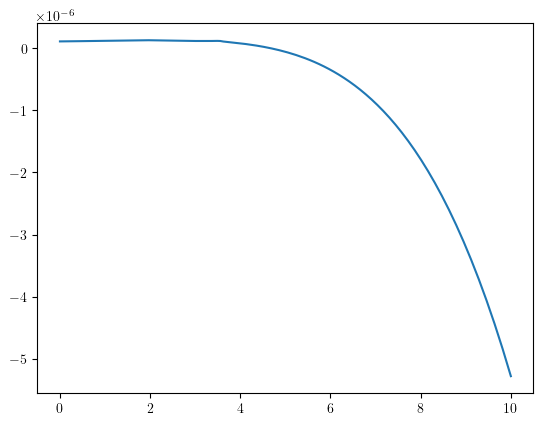

In [21]:
gA_list = [float(g[0]) for g in gvector]
plt.plot(mphi_list, gA_list)

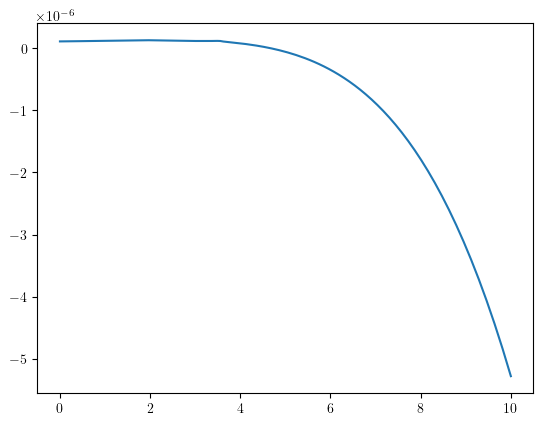

In [22]:
gV_list = [float(g[1]) for g in gvector]
plt.plot(mphi_list, gA_list)

In [23]:
bound_gV_lower = []
bound_gV_upper = []
bound_gA_lower = []
bound_gA_upper = []
bound_gA_lower2 = []
bound_gA_upper2 = []
bound_s2W_lower = []
bound_s2W_upper = []
for g in gvector:
    b1l = ((gA_SM-gA_exp+gA_err)/float(g[0]))
    b1u = ((gA_SM-gA_exp-gA_err)/float(g[0]))
    b2l = ((gA_SM-gA_exp+2*gA_err)/float(g[0]))
    b2u = ((gA_SM-gA_exp-2*gA_err)/float(g[0]))
    if b1l > 0:
        bound_gA_lower.append(b1l**0.5)
    else:
        bound_gA_lower.append(float('NaN'))
    if b1u > 0:
        bound_gA_upper.append(b1u**0.5)
    else:
        bound_gA_upper.append(float('NaN'))
    if b2l > 0:
        bound_gA_lower2.append(b2l**0.5)
    else:
        bound_gA_lower2.append(float('NaN'))
    if b2u > 0:
        bound_gA_upper2.append(b2u**0.5)
    else:
        bound_gA_upper2.append(float('NaN'))
    bvl = ((gV_SM-gV_exp+gV_err)/float(g[1]))
    bvu = ((gV_SM-gV_exp-gV_err)/float(g[1]))
    if bvl > 0:
        bound_gV_lower.append(bvl**0.5)
    else:
        bound_gV_lower.append(float('NaN'))
    if bvu > 0:
        bound_gV_upper.append(bvu**0.5)
    else:
        bound_gV_upper.append(float('NaN'))
    s2W_calc = 0.25*(1-float(g[1])/float(g[0]))
    bsl = ((s2Weff-s2W_exp+s2W_err)/s2W_calc)
    bsu = ((s2Weff-s2W_exp+s2W_err)/s2W_calc)


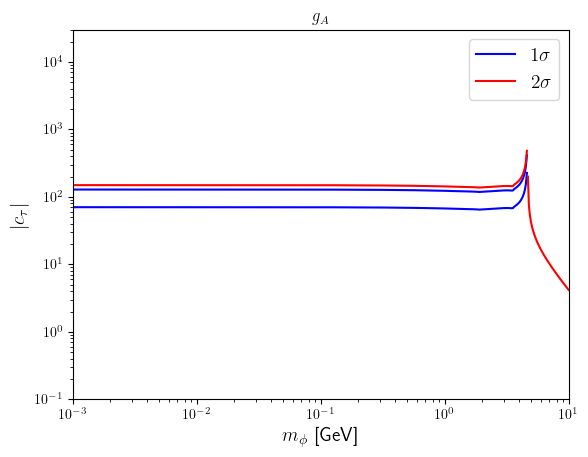

In [24]:
plt.loglog(mphi_list, bound_gA_lower, color='b', label=r'$1 \sigma$')
plt.loglog(mphi_list, bound_gA_upper, color='b')
plt.loglog(mphi_list, bound_gA_lower2, color='r', label=r'$2 \sigma$')
plt.loglog(mphi_list, bound_gA_upper2, color='r')
plt.xlim(1e-3, 10)
plt.ylim(1e-1, 3e4)
plt.xlabel(r'$m_\phi$ [GeV]', fontsize=14)
plt.ylabel(r'$|c_\tau|$', fontsize=14)
plt.title(r"$g_A$")
plt.legend(fontsize=14)

Text(0.5, 1.0, '$g_V$')

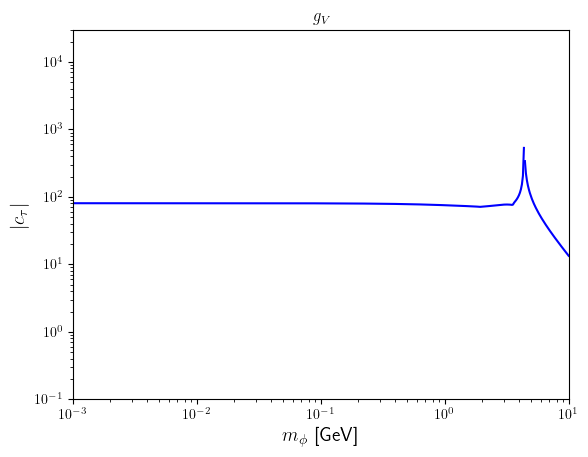

In [25]:
plt.loglog(mphi_list, bound_gV_lower, color='b', label=r'$1 \sigma$')
plt.loglog(mphi_list, bound_gV_upper, color='b')
plt.xlim(1e-3, 10)
plt.ylim(1e-1, 3e4)
plt.xlabel(r'$m_\phi$ [GeV]', fontsize=14)
plt.ylabel(r'$|c_\tau|$', fontsize=14)
plt.title(r"$g_V$")

In [26]:
def delta_s2W(mphi):
    return -0.25*(1-(1-Atau_SM**2)**0.5)/(Atau_SM**2*(1-Atau_SM**2)**0.5)*Atau_phi(mphi)

In [27]:
bound_s2W_lower = []
bound_s2W_upper = []

for m in mphi_list:
    ds2W = delta_s2W(m)
    bl = (s2W_exp-s2W_exp+s2W_err)/ds2W
    bu = (s2W_exp-s2W_exp-s2W_err)/ds2W
    if bl > 0:
        bound_s2W_lower.append(bl**0.5)
    else:
        bound_s2W_lower.append(float('NaN'))
    if bu > 0:
        bound_s2W_upper.append(bu**0.5)
    else:
        bound_s2W_upper.append(float('NaN'))

Text(0.5, 1.0, '$\\sin^2\\theta_W$')

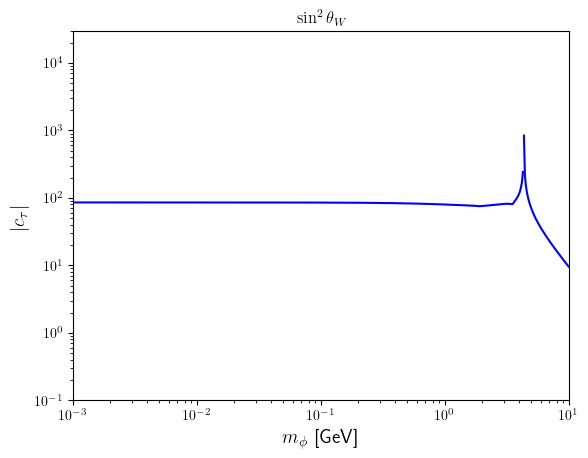

In [28]:
plt.loglog(mphi_list, bound_s2W_lower, color='b', label=r'$1 \sigma$')
plt.loglog(mphi_list, bound_s2W_upper, color='b')
plt.xlim(1e-3, 10)
plt.ylim(1e-1, 3e4)
plt.xlabel(r'$m_\phi$ [GeV]', fontsize=14)
plt.ylabel(r'$|c_\tau|$', fontsize=14)
plt.title(r"$\sin^2\theta_W$")